In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Data Pre-Processing
dataset = pd.read_csv('Social_Media.csv')
x = dataset.iloc[ : , [ 2 , 3 ]].values
y = dataset.iloc[ : , 4 ].values

df = pd.DataFrame(dataset)
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [17]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.50 , random_state = 0 )


In [20]:
# feature scaling

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

df = pd.DataFrame(x_test)
df

,0,1
0,1.723248,-1.155285
1,-0.395333,0.497343
2,-1.287368,0.554330
3,0.273692,-1.269260
4,0.608205,-1.212273
5,1.946257,-0.385959
6,-0.395333,-0.300478
7,2.057761,-0.955830
8,-0.506838,-0.841856
9,-0.283829,0.611317


In [22]:
# Fitting Logistic Regression to training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0 )
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [25]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df

,0
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [34]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[7 0]
 [0 4]]


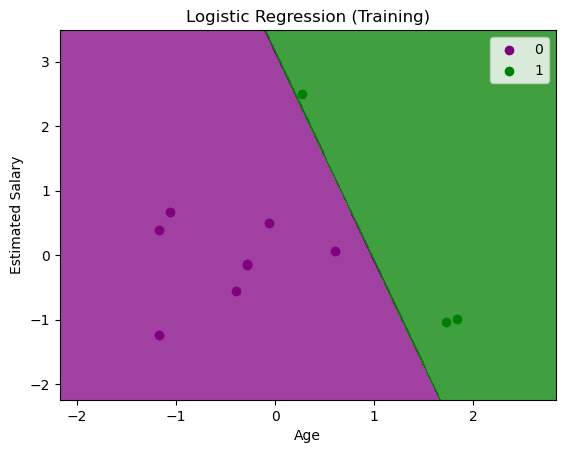

In [41]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(j), label=j)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression (Training)')
plt.legend()
plt.show()

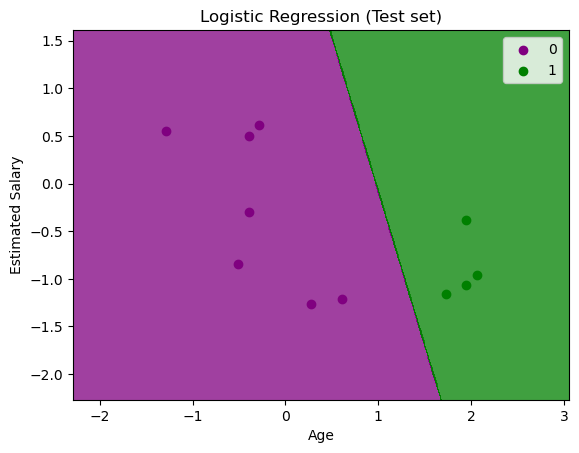

In [42]:
# Visualizing the test set result
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for j in np.unique(y_set):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(j), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()